<a href="https://colab.research.google.com/github/sipocz/ingatlan/blob/master/hungary_terkep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [486]:
import requests
from bs4 import  BeautifulSoup
from google.colab import drive
import time
drive.mount('/content/drive',force_remount=True)



Mounted at /content/drive


In [487]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [488]:
!ls
!cd sample_data/
!ls

drive  sample_data
drive  sample_data


In [489]:
csv=open("/content/drive/My Drive/Ingatlan/hun_city_pos.csv",encoding="Latin-1")
all_city=[]
for i in csv:
    a_city=i.strip().split(";")
    #print(a_city)
    all_city.append(a_city)

all_city_data=[]
for a_city in all_city[1:]:
    f,p=a_city[1].split(":")
    posx=float(f)+float(p)/60
    q,r=a_city[2].split(":")
    posy=float(q)+float(r)/60
    all_city_data.append(a_city+[posx,posy])
#print(all_city_data)
ser=pd.DataFrame(all_city_data,columns=["nev","pos1","pos2","x","y"])
ser



,nev,pos1,pos2,x,y
0,Aba,18:31.49,47:02.06,18.524833,47.034333
1,Abádszalók,20:35.94,47:28.48,20.599000,47.474667
2,Abaliget,18:07.09,46:08.63,18.118167,46.143833
3,Abasár,20:00.50,47:48.04,20.008333,47.800667
4,Abaújalpár,21:14.14,48:18.37,21.235667,48.306167
...,...,...,...,...,...
3132,Zsennye,16:48.94,47:06.83,16.815667,47.113833
3133,Zsira,16:40.94,47:27.34,16.682333,47.455667
3134,Zsombó,19:58.45,46:19.67,19.974167,46.327833
3135,Zsujta,21:16.80,48:30.04,21.280000,48.500667


In [490]:
hu_m = plt.imread('/content/drive/My Drive/Ingatlan/hungary_16078_22983_45725_48597.png')

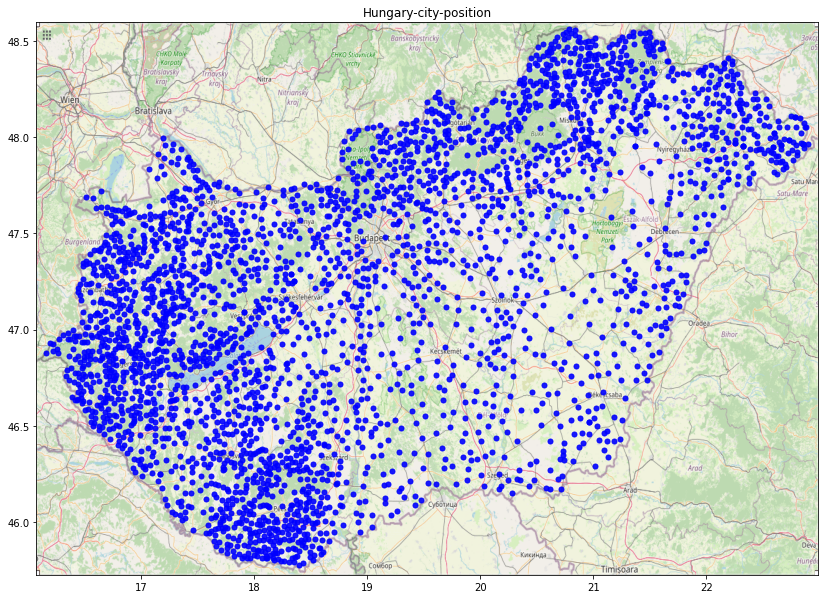

In [491]:
fig,ax=plt.subplots(figsize = (14,14))
ax.set_title('Hungary-city-position')
box=(16.078,22.983,45.725,48.597)
#ser=pd.DataFrame({"x":[19], "y":[47]})
#print(ser)
ax.scatter(ser.x, ser.y,zorder=1, alpha= 0.9, c='b', s=25)
ax.set_xlim(box[0],box[1])
ax.set_ylim(box[2],box[3])
ax.imshow(hu_m, zorder=0, extent = box,aspect= 1.7);

In [492]:
def convert_space(a):
    if '\xa0' in a:
        t=a.find("\xa0")
        o=int(a[:t]+a[t+1:])
        return(o)
    else:
        return(int(a))


In [493]:
convert_space('1\xa0568')

1568

In [494]:

csv=open("/content/drive/My Drive/Ingatlan/hu_lakossag_2019.csv",encoding="Latin-1")
all_people=[]
for i in csv:
    a_city_people=i.strip().split(";")
    #print(a_city)
    all_people.append(a_city_people)
csv.close()
print(all_people[9:])


[['1', '09566', 'BUD', 'Budapest                 01', 'fõvárosi kerület', '11\xa0987', '14\xa0162', '26\xa0149'], ['1', '03179', 'BUD', 'Budapest                 02', 'fõvárosi kerület', '40\xa0101', '47\xa0309', '87\xa0410'], ['1', '18069', 'BUD', 'Budapest                 03', 'fõvárosi kerület', '57\xa0921', '68\xa0071', '125\xa0992'], ['1', '05467', 'BUD', 'Budapest                 04', 'fõvárosi kerület', '44\xa0834', '52\xa0459', '97\xa0293'], ['1', '13392', 'BUD', 'Budapest                 05', 'fõvárosi kerület', '12\xa0428', '13\xa0600', '26\xa0028'], ['1', '16586', 'BUD', 'Budapest                 06', 'fõvárosi kerület', '17\xa0645', '19\xa0486', '37\xa0131'], ['1', '29744', 'BUD', 'Budapest                 07', 'fõvárosi kerület', '24\xa0703', '27\xa0142', '51\xa0845'], ['1', '25405', 'BUD', 'Budapest                 08', 'fõvárosi kerület', '35\xa0340', '35\xa0913', '71\xa0253'], ['1', '29586', 'BUD', 'Budapest                 09', 'fõvárosi kerület', '25\xa0971', '28\xa04

In [495]:
for i in all_people[9:]:
    if i[3]=="Miskolc":
        print(i)

['5', '30456', 'BOR', 'Miskolc', 'megye székhely', '74\xa0606', '84\xa0659', '159\xa0265']


In [496]:
#print(all_people)
all_info=[]
for dat in all_people[9:]:
    dat[0]=int(dat[0])
    dat[5]=convert_space(dat[5])
    dat[6]=convert_space(dat[6])
    dat[7]=convert_space(dat[7])
    
    all_info.append(dat)

print(all_info)

    



[[1, '09566', 'BUD', 'Budapest                 01', 'fõvárosi kerület', 11987, 14162, 26149], [1, '03179', 'BUD', 'Budapest                 02', 'fõvárosi kerület', 40101, 47309, 87410], [1, '18069', 'BUD', 'Budapest                 03', 'fõvárosi kerület', 57921, 68071, 125992], [1, '05467', 'BUD', 'Budapest                 04', 'fõvárosi kerület', 44834, 52459, 97293], [1, '13392', 'BUD', 'Budapest                 05', 'fõvárosi kerület', 12428, 13600, 26028], [1, '16586', 'BUD', 'Budapest                 06', 'fõvárosi kerület', 17645, 19486, 37131], [1, '29744', 'BUD', 'Budapest                 07', 'fõvárosi kerület', 24703, 27142, 51845], [1, '25405', 'BUD', 'Budapest                 08', 'fõvárosi kerület', 35340, 35913, 71253], [1, '29586', 'BUD', 'Budapest                 09', 'fõvárosi kerület', 25971, 28489, 54460], [1, '10700', 'BUD', 'Budapest                 10', 'fõvárosi kerület', 34159, 38748, 72907], [1, '14216', 'BUD', 'Budapest                 11', 'fõvárosi kerület

In [497]:
for i in all_people[9:]:
    if i[3]=="Kistótfalu":
        print(i)

[2, '10746', 'BAR', 'Kistótfalu', 'község', 160, 147, 307]


In [498]:
all_info

[[1,
  '09566',
  'BUD',
  'Budapest                 01',
  'fõvárosi kerület',
  11987,
  14162,
  26149],
 [1,
  '03179',
  'BUD',
  'Budapest                 02',
  'fõvárosi kerület',
  40101,
  47309,
  87410],
 [1,
  '18069',
  'BUD',
  'Budapest                 03',
  'fõvárosi kerület',
  57921,
  68071,
  125992],
 [1,
  '05467',
  'BUD',
  'Budapest                 04',
  'fõvárosi kerület',
  44834,
  52459,
  97293],
 [1,
  '13392',
  'BUD',
  'Budapest                 05',
  'fõvárosi kerület',
  12428,
  13600,
  26028],
 [1,
  '16586',
  'BUD',
  'Budapest                 06',
  'fõvárosi kerület',
  17645,
  19486,
  37131],
 [1,
  '29744',
  'BUD',
  'Budapest                 07',
  'fõvárosi kerület',
  24703,
  27142,
  51845],
 [1,
  '25405',
  'BUD',
  'Budapest                 08',
  'fõvárosi kerület',
  35340,
  35913,
  71253],
 [1,
  '29586',
  'BUD',
  'Budapest                 09',
  'fõvárosi kerület',
  25971,
  28489,
  54460],
 [1,
  '10700',
  'BUD',
  

In [499]:
print(all_city_data)

[['Aba', '18:31.49', '47:02.06', 18.524833333333333, 47.034333333333336], ['Abádszalók', '20:35.94', '47:28.48', 20.599, 47.474666666666664], ['Abaliget', '18:07.09', '46:08.63', 18.118166666666667, 46.14383333333333], ['Abasár', '20:00.50', '47:48.04', 20.008333333333333, 47.800666666666665], ['Abaújalpár', '21:14.14', '48:18.37', 21.235666666666667, 48.30616666666667], ['Abaújkér', '21:12.08', '48:18.47', 21.201333333333334, 48.307833333333335], ['Abaújlak', '20:57.45', '48:24.35', 20.9575, 48.405833333333334], ['Abaújszántó', '21:11.18', '48:16.74', 21.186333333333334, 48.279], ['Abaújszolnok', '20:58.63', '48:22.35', 20.977166666666665, 48.3725], ['Abaújvár', '21:18.99', '48:31.59', 21.3165, 48.5265], ['Abda', '17:32.65', '47:41.79', 17.544166666666666, 47.6965], ['Abod', '20:47.65', '48:23.60', 20.794166666666666, 48.39333333333333], ['Abony', '20:00.72', '47:11.56', 20.012, 47.19266666666667], ['Ábrahámhegy', '17:34.36', '46:48.96', 17.572666666666667, 46.816], ['Ács', '18:00.94'

In [500]:
for i in all_people[9:]:
    if i[3]=="Petõfiszállás":
        print(i)

[3, '15431', 'BAC', 'Petõfiszállás', 'község', 787, 781, 1568]


In [501]:
fullinfo=[]
for citydata in all_city_data:
    for peopledata in all_info:
        #print(citydata[0], peopledata[3])
        if (citydata[0] == peopledata[3]):
            #print("BINGO")
            print(citydata[0], peopledata[3])
            o=citydata+peopledata
            fullinfo.append(o)
            break
    

Aba Aba
Abádszalók Abádszalók
Abaliget Abaliget
Abasár Abasár
Abaújalpár Abaújalpár
Abaújkér Abaújkér
Abaújlak Abaújlak
Abaújszántó Abaújszántó
Abaújszolnok Abaújszolnok
Abaújvár Abaújvár
Abda Abda
Abod Abod
Abony Abony
Ábrahámhegy Ábrahámhegy
Ács Ács
Acsa Acsa
Acsád Acsád
Acsalag Acsalag
Ácsteszér Ácsteszér
Adács Adács
Ádánd Ádánd
Adásztevel Adásztevel
Adony Adony
Adorjánháza Adorjánháza
Adorjás Adorjás
Ág Ág
Ágasegyháza Ágasegyháza
Ágfalva Ágfalva
Aggtelek Aggtelek
Agyagosszergény Agyagosszergény
Ajak Ajak
Ajka Ajka
Aka Aka
Akasztó Akasztó
Alacska Alacska
Alap Alap
Alattyán Alattyán
Albertirsa Albertirsa
Alcsútdoboz Alcsútdoboz
Aldebrõ Aldebrõ
Algyõ Algyõ
Alibánfa Alibánfa
Almamellék Almamellék
Almásfüzitõ Almásfüzitõ
Almásháza Almásháza
Almáskamarás Almáskamarás
Almáskeresztúr Almáskeresztúr
Álmosd Álmosd
Alsóberecki Alsóberecki
Alsóbogát Alsóbogát
Alsódobsza Alsódobsza
Alsógagy Alsógagy
Alsómocsolád Alsómocsolád
Alsónána Alsónána
Alsónémedi Alsónémedi
Alsónemesapáti Alsónemesapáti


In [502]:
print(fullinfo)

[['Aba', '18:31.49', '47:02.06', 18.524833333333333, 47.034333333333336, 7, '17376', 'FEJ', 'Aba', 'város', 2297, 2363, 4660], ['Abádszalók', '20:35.94', '47:28.48', 20.599, 47.474666666666664, 16, '12441', 'SZO', 'Abádszalók', 'város', 2077, 2177, 4254], ['Abaliget', '18:07.09', '46:08.63', 18.118166666666667, 46.14383333333333, 2, '12548', 'BAR', 'Abaliget', 'község', 365, 341, 706], ['Abasár', '20:00.50', '47:48.04', 20.008333333333333, 47.800666666666665, 10, '24554', 'HEV', 'Abasár', 'község', 1178, 1304, 2482], ['Abaújalpár', '21:14.14', '48:18.37', 21.235666666666667, 48.30616666666667, 5, '15662', 'BOR', 'Abaújalpár', 'község', 36, 33, 69], ['Abaújkér', '21:12.08', '48:18.47', 21.201333333333334, 48.307833333333335, 5, '26718', 'BOR', 'Abaújkér', 'község', 293, 330, 623], ['Abaújlak', '20:57.45', '48:24.35', 20.9575, 48.405833333333334, 5, '02820', 'BOR', 'Abaújlak', 'község', 50, 43, 93], ['Abaújszántó', '21:11.18', '48:16.74', 21.186333333333334, 48.279, 5, '03595', 'BOR', 'A

In [503]:
for i in fullinfo[0:]:
    #print(i,end="")
    if i[0]=="Abaliget":
        print(i)

['Abaliget', '18:07.09', '46:08.63', 18.118166666666667, 46.14383333333333, 2, '12548', 'BAR', 'Abaliget', 'község', 365, 341, 706]


a

In [514]:

def printCSV(fname,arr,mode="a"):
    csvfile=open(fname,mode)
    for row in arr:
        for i in range(len(row)):
            if i!= len(row)-1:
                print(row[i],end=",",file=csvfile)
                print(row[i],end=",")

            else:
                print(row[i],end="",file=csvfile)
                print(row[i],end="")


           
            
        print("",end="\n",file=csvfile)
        print("",end="\n")

    csvfile.close()


In [ ]:
fname="/content/drive/My Drive/Ingatlan/hu_telepulesek_adatai2.csv"
printCSV(fname,fullinfo)

In [520]:
fullinfo[-1]


['Zsurk',
 '22:13.40',
 '48:23.93',
 22.223333333333333,
 48.398833333333336,
 15,
 '13037',
 'SZA',
 'Zsurk',
 'község',
 372,
 363,
 735]

In [522]:
datafrm=pd.read_csv("/content/drive/My Drive/Ingatlan/hu_telepulesek_adatai2.csv",sep=",",names=["nev","posx","posy","x","y","megye","id","megyeid","nev2","tipus","ferfiak","nok","lakossag"])
ff=pd.Series(list(fullinfo[0:-1][10:10]))
#datafrm=pd.DataFrame(columns=fullinfo[:][10],dtype=float64)

datafrm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,nev,posx,posy,x,y,megye,id,megyeid,nev2,tipus,ferfiak,nok,lakossag
0,Aba,18:31.49,47:02.06,18.524833,47.034333,7,17376,FEJ,Aba,város,2297,2363,4660
1,Abádszalók,20:35.94,47:28.48,20.599000,47.474667,16,12441,SZO,Abádszalók,város,2077,2177,4254
2,Abaliget,18:07.09,46:08.63,18.118167,46.143833,2,12548,BAR,Abaliget,község,365,341,706
3,Abasár,20:00.50,47:48.04,20.008333,47.800667,10,24554,HEV,Abasár,község,1178,1304,2482
4,Abaújalpár,21:14.14,48:18.37,21.235667,48.306167,5,15662,BOR,Abaújalpár,község,36,33,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,Zsennye,16:48.94,47:06.83,16.815667,47.113833,18,12292,VAS,Zsennye,község,57,51,108
3119,Zsira,16:40.94,47:27.34,16.682333,47.455667,8,4622,GYO,Zsira,község,435,427,862
3120,Zsombó,19:58.45,46:19.67,19.974167,46.327833,6,17765,CSO,Zsombó,község,1778,1758,3536
3121,Zsujta,21:16.80,48:30.04,21.280000,48.500667,5,11022,BOR,Zsujta,község,89,93,182


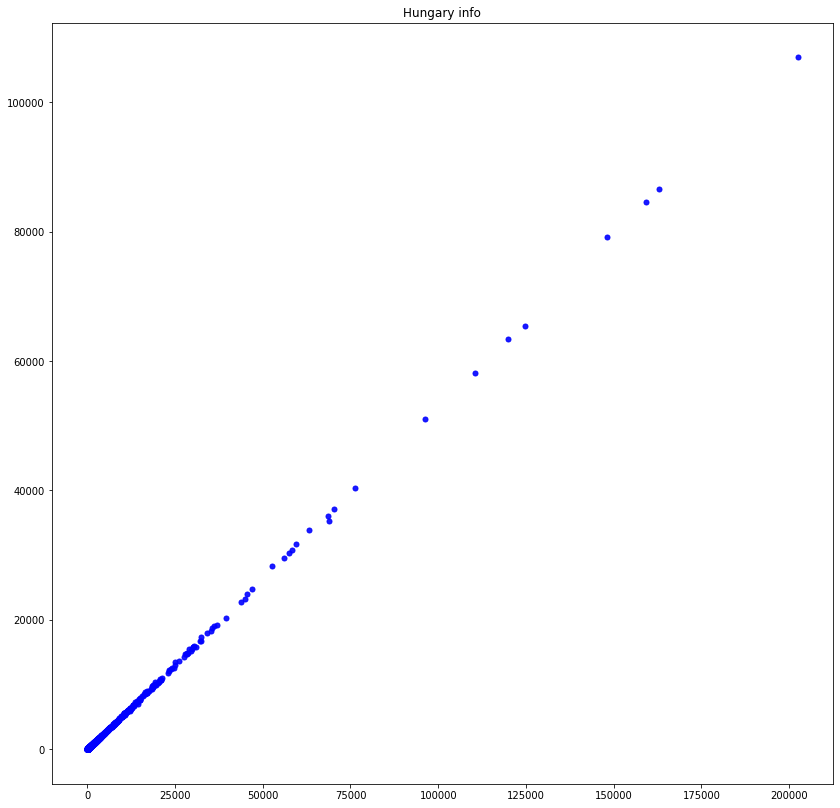

In [523]:
fig,ax2=plt.subplots(figsize = (14,14))
ax2.set_title('Hungary info')
box=(16.078,22.983,45.725,48.597)

ax2.scatter(datafrm.lakossag, datafrm.nok,zorder=1, alpha= 0.9, c='b', s=25)

fig.show()


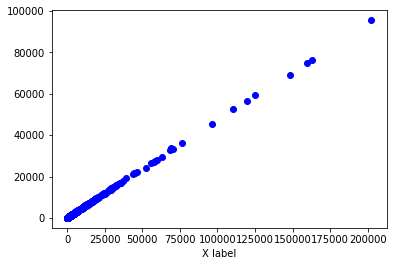

In [524]:
import matplotlib.pyplot as plt #pyplot: MATLAB-hoz hasonló ábrák készítéséhez
import numpy as np

#2D üggvény ábrázoláshoz
x = datafrm.lakossag

#print(type(x))
y = datafrm.ferfiak
plt.plot(x, y,"ro")

plt.title('lakosság')
plt.ylabel('Ferfiak')
plt.xlabel('Phase')
plt.axes(xlabel="X label")
plt.plot(x,y,"bo")
plt.show();

(array([3.101e+03, 1.400e+01, 3.000e+00, 3.000e+00, 2.000e+00]),
 array([8.000000e+00, 4.048680e+04, 8.096560e+04, 1.214444e+05,
        1.619232e+05, 2.024020e+05]),
 <a list of 5 Patch objects>)

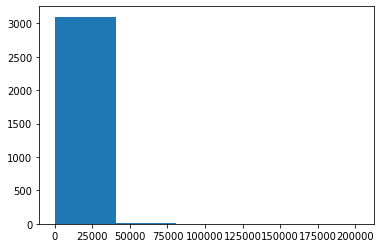

In [526]:
plt.hist(datafrm.lakossag,5)

In [527]:
datafrm


,nev,posx,posy,x,y,megye,id,megyeid,nev2,tipus,ferfiak,nok,lakossag
0,Aba,18:31.49,47:02.06,18.524833,47.034333,7,17376,FEJ,Aba,város,2297,2363,4660
1,Abádszalók,20:35.94,47:28.48,20.599000,47.474667,16,12441,SZO,Abádszalók,város,2077,2177,4254
2,Abaliget,18:07.09,46:08.63,18.118167,46.143833,2,12548,BAR,Abaliget,község,365,341,706
3,Abasár,20:00.50,47:48.04,20.008333,47.800667,10,24554,HEV,Abasár,község,1178,1304,2482
4,Abaújalpár,21:14.14,48:18.37,21.235667,48.306167,5,15662,BOR,Abaújalpár,község,36,33,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,Zsennye,16:48.94,47:06.83,16.815667,47.113833,18,12292,VAS,Zsennye,község,57,51,108
3119,Zsira,16:40.94,47:27.34,16.682333,47.455667,8,4622,GYO,Zsira,község,435,427,862
3120,Zsombó,19:58.45,46:19.67,19.974167,46.327833,6,17765,CSO,Zsombó,község,1778,1758,3536
3121,Zsujta,21:16.80,48:30.04,21.280000,48.500667,5,11022,BOR,Zsujta,község,89,93,182
